In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [4]:
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [5]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

In [6]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,15.738714
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,8.809949
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,1.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,8.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,16.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,23.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,31.000000


In [8]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [9]:
# The data divide into
numerical_values=['temp', 'atemp', 'hum', 'windspeed']
categerical_values=['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']

<ipython-input-10-0e61d0603a1b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


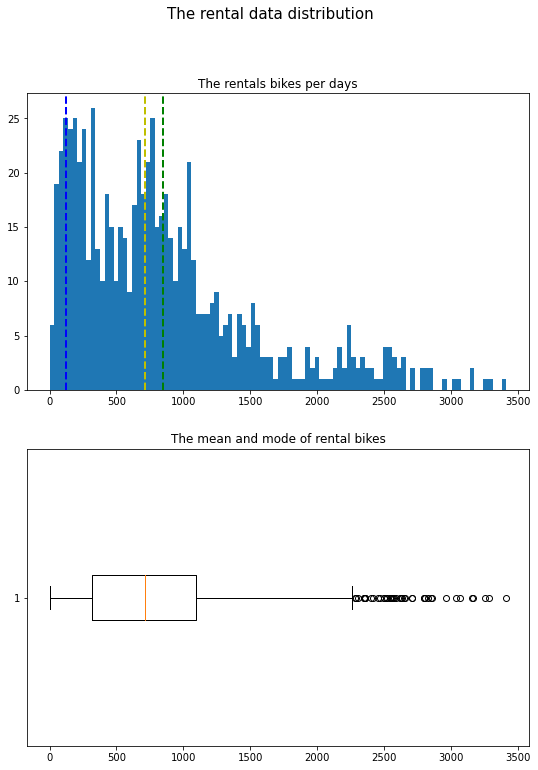

In [10]:
# label means predicted value
label=bike_data['rentals']

fig, ax=plt.subplots(2, 1, figsize=(9,12))
#create a histgraph
ax[0].hist(label, bins=100)
ax[0].set_title('The rentals bikes per days')
ax[0].axvline(x=label.mean(), linestyle='--', linewidth=2, color='g')
ax[0].axvline(x=label.median(), linestyle='--', linewidth=2, color='y')
ax[0].axvline(x=label.mode()[0], linestyle='--', linewidth=2, color='b')

#Create a box plot
ax[1].boxplot(label, vert=False)
ax[1].set_title('The mean and mode of rental bikes')

fig.suptitle('The rental data distribution', fontsize=15)
fig.show()

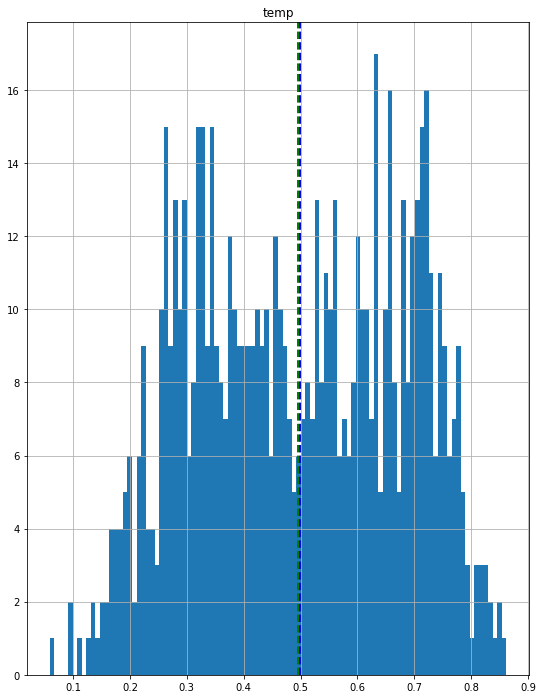

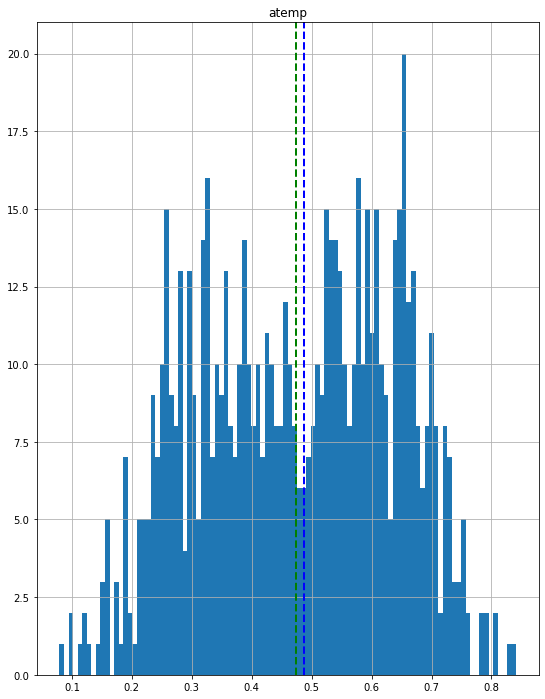

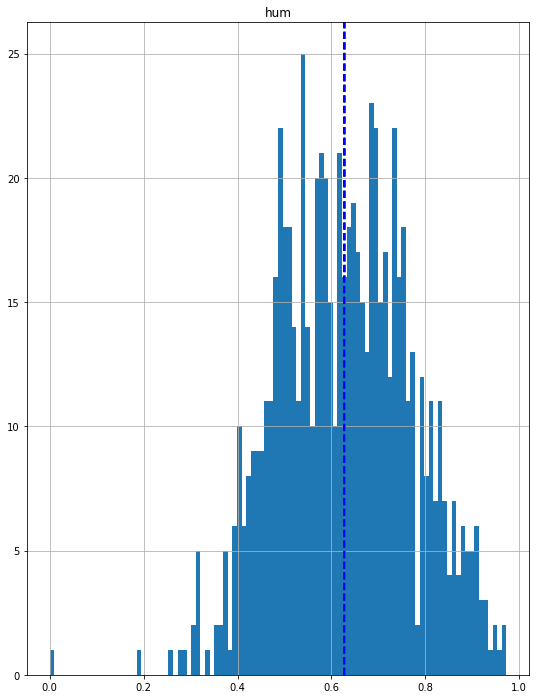

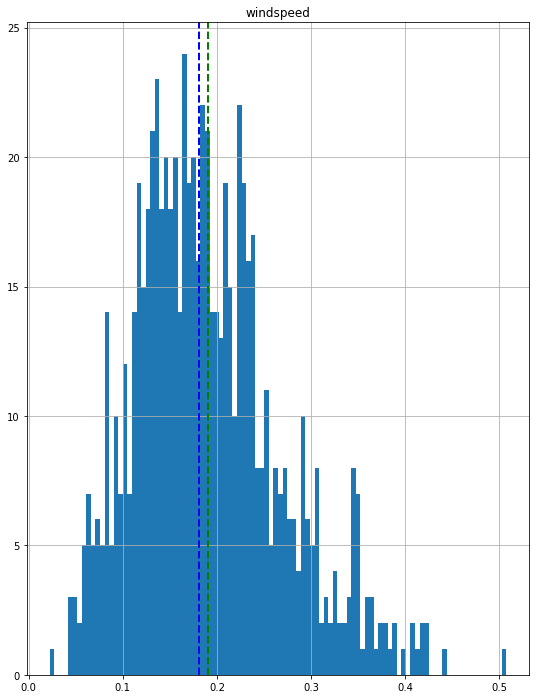

In [11]:
for col in numerical_values:
    fig=plt.figure(figsize=(9, 12))
    ax=fig.gca()
    features=bike_data[col]
    features.hist(bins=100, ax=ax)
    ax.axvline(x=features.mean(), linestyle='--', linewidth=2, color='g')
    ax.axvline(x=features.median(), linestyle='--', linewidth=2, color='b')
    ax.set_title(col)
    plt.show()
    

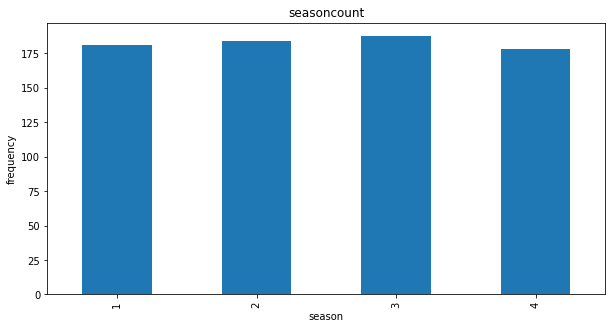

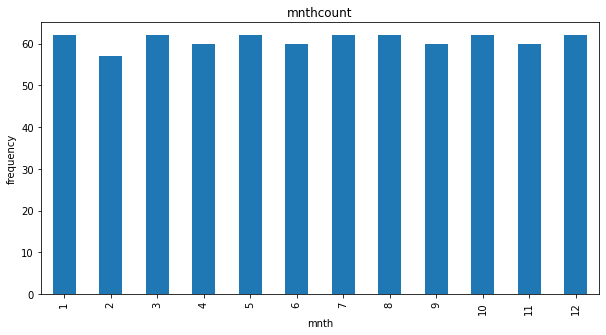

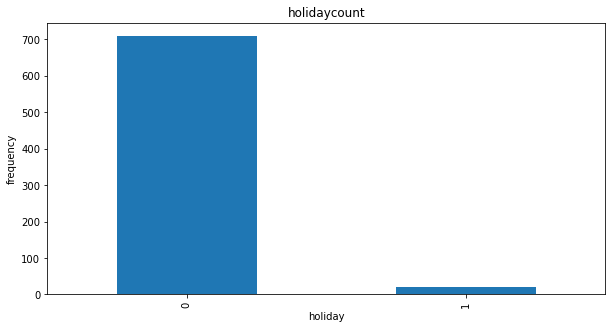

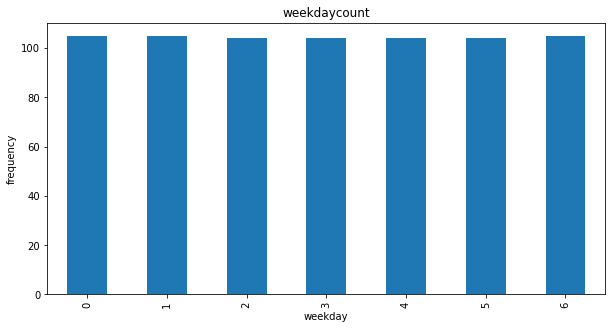

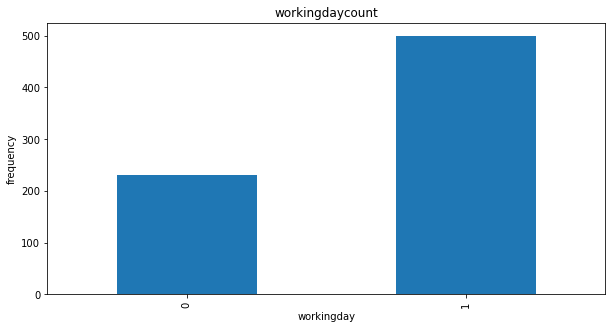

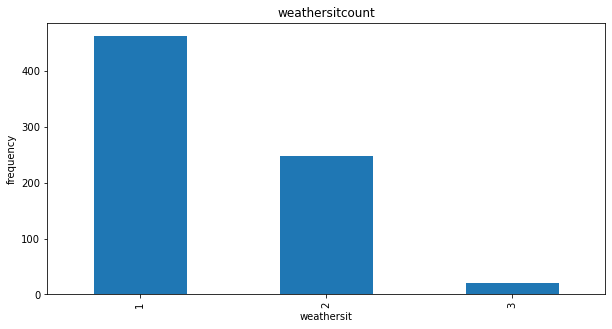

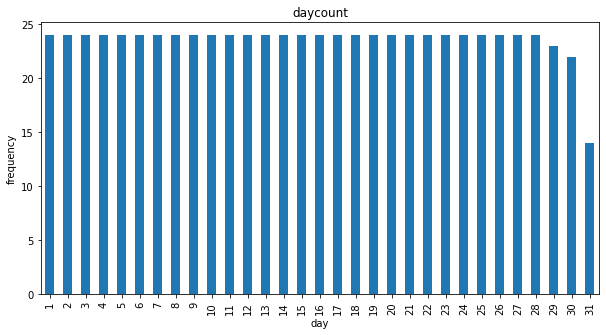

In [12]:
# The categorical values are shown in bar chart or box plot 

for col in categerical_values:
    fig=plt.figure(figsize=(10, 5))
    ax=fig.gca()
    counts=bike_data[col].value_counts().sort_index()
    counts.plot.bar( ax=ax)
    ax.set_title(col+'count')
    ax.set_xlabel(col)
    ax.set_ylabel('frequency')
    plt.show()
    

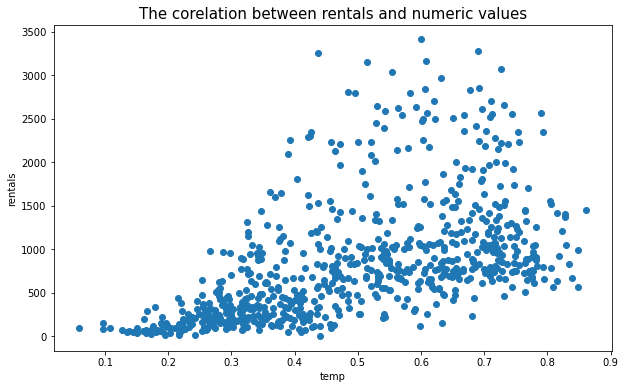

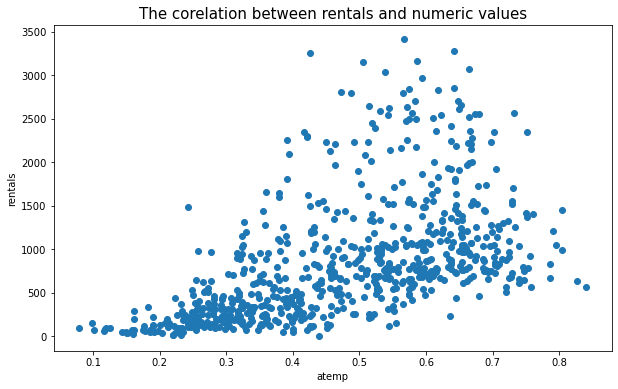

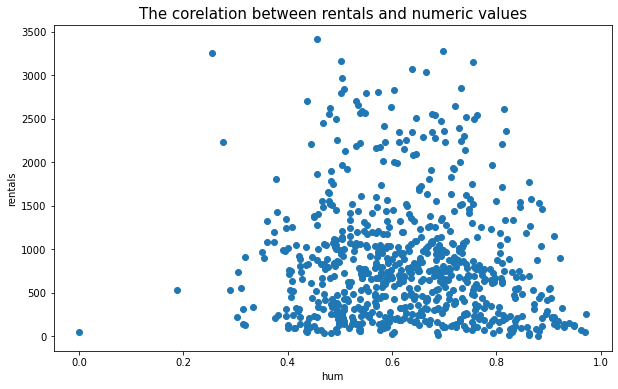

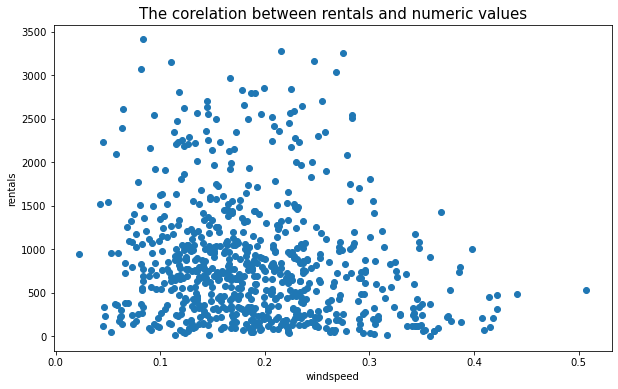

In [16]:
# scatter plot compare the rentals data with numerical_values
for col in numerical_values:
    fig=plt.figure(figsize=(10,6))
    ax=fig.gca()
    features=bike_data[col]
    label=bike_data['rentals']
    ax.scatter(x=features, y=label)
    ax.set_title('The corelation between rentals and numeric values', fontsize=15)
    ax.set_xlabel(col)
    ax.set_ylabel('rentals')
    plt.show()

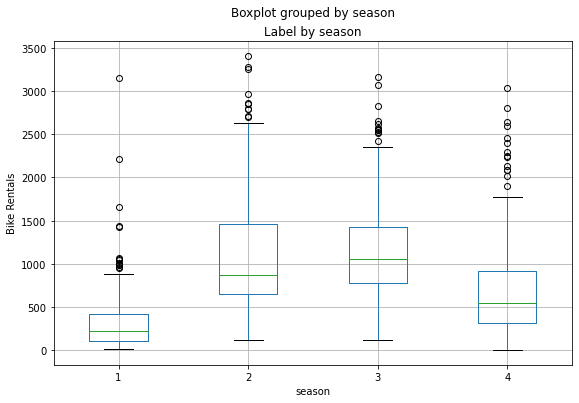

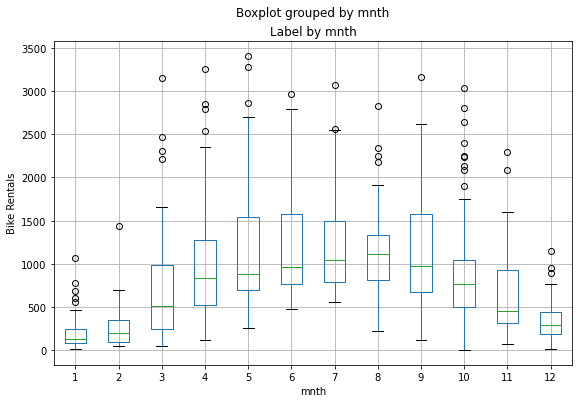

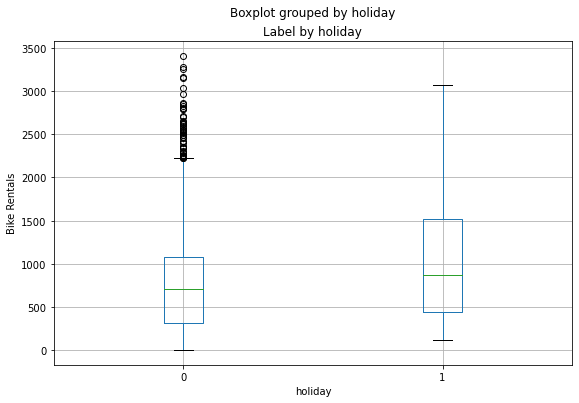

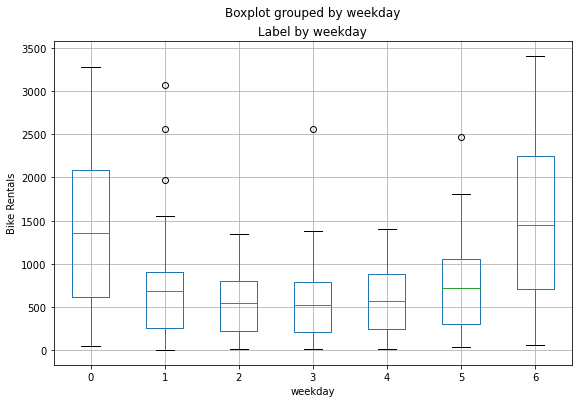

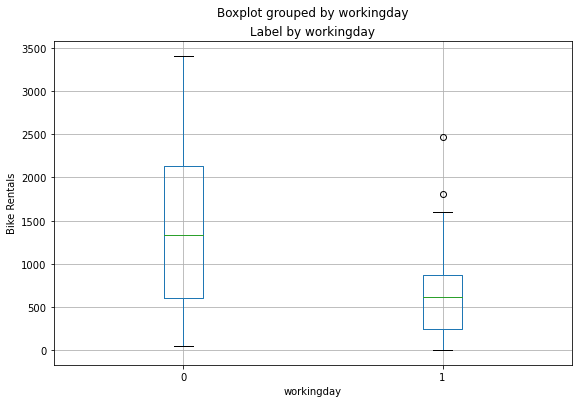

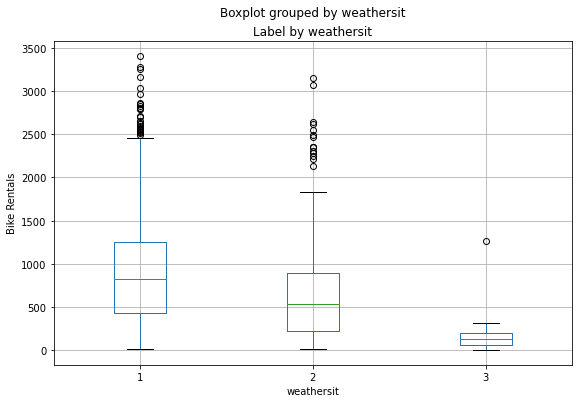

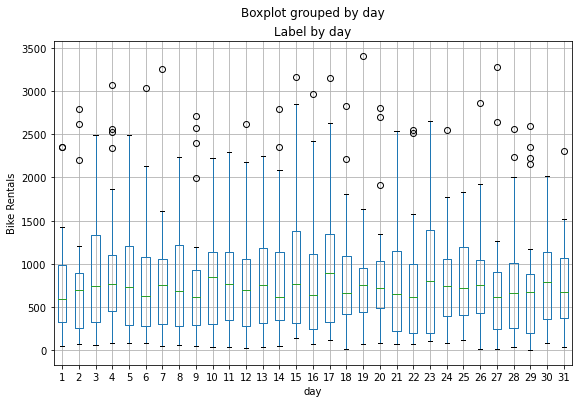

In [17]:
# plot a boxplot for the label by each categorical feature
for col in categerical_values:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

In [18]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

# Linear Regression

In [19]:
x=bike_data[['season', 'mnth', 'holiday', 'weekday',
             'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y=bike_data['rentals']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
test_score=model.score(x_test, y_test)
train_score=model.score(x_train, y_train)
print('test-score:', test_score)
print('train_score:', train_score)

test-score: 0.6040454736919186
train_score: 0.6572018150411183


In [22]:
predictions=model.predict(x_test)
print('The prediction values:', predictions)

The prediction values: [1895.66782612 1183.91334853 1006.76381203  -27.72524904  313.62301448
  385.40476901  474.54590338  589.58044986 1476.48323136  -21.99577138
  -41.77593786  -39.67533075   51.96427539 1014.20516117 1192.69408639
  770.430283    749.81633179 1472.3338694    34.82692012  251.2720285
 1218.15748892  787.12186106  304.14632333 1746.79882791  583.60246955
 1745.18887517 1458.61104926 1096.15185407 1605.20699725 1680.35312322
  584.21703229  994.74300543  443.21604601 1981.54485451   73.10893925
 1126.65859185 1111.41174683 2347.45829215  401.1836505   329.94765485
 1490.28961091  975.46905531  919.56502208  256.44439964 1101.0896142
  833.99701601  614.36344658 1301.88810639  942.11865323  990.90712437
 1495.09228773 1134.51508006  539.36657513  741.08071718  937.65335453
 1327.40538809  229.686131    666.69330267 1108.66689875  277.14040469
  712.75941943 1202.222265    469.00401898 1709.11796672  883.80111373
  681.53920892  813.95201097  357.31041537 1794.53629589

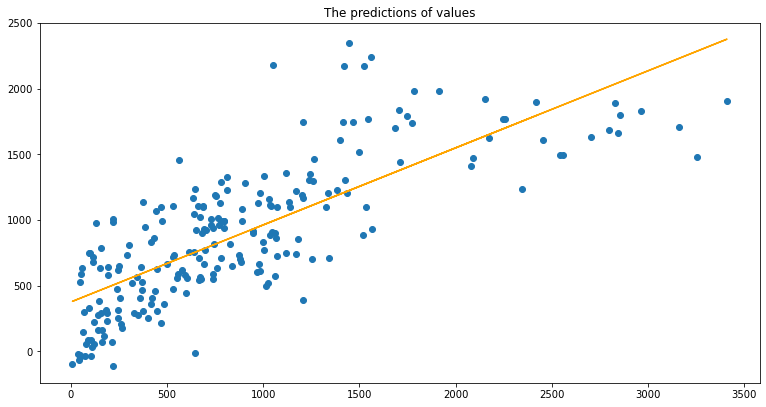

In [23]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test, predictions)
ax.set_title('The predictions of values')
# draw a line through regression
z=np.polyfit(y_test, predictions,1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='orange')
plt.show()

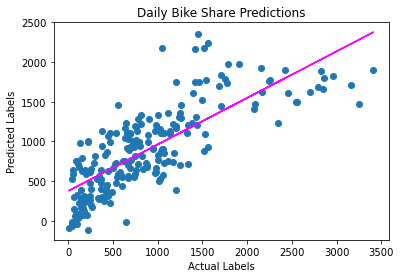

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


In [26]:
x=bike_data[['season', 'mnth', 'holiday', 'weekday',
             'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y=bike_data['rentals']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
model1=LinearRegression()
model1.fit(x_train, y_train)
test_score=model1.score(x_test, y_test)
train_score=model1.score(x_train, y_train)
print(test_score)
print(train_score)
pred=model1.predict(x_test)
print(pred)

0.6013016737003893
0.6557943832595248
[1925.03114829 1195.72220656 1024.27096671  -73.49211785  299.64595811
  331.9644852   448.2857593   531.36407638 1533.98518979  -31.4657559
  -21.18581536  -22.41170486   94.40146593 1031.32476364 1194.92111618
  754.9487753   756.50007147 1447.57637733   81.16220838  232.4001501
 1222.30404395  815.66172135  271.98581841 1720.88810275  523.61549484
 1688.62726441 1495.12408429 1088.22436119 1565.19253289 1722.10690683
  572.60712454 1005.84316662  399.22624553 2015.16921252  144.37723124
 1159.12292625 1151.12002789 2389.85701027  433.01935027  295.82552158
 1529.08017731  945.22193082  906.5390774   286.20083673 1101.00394572
  797.42271147  644.07656875 1294.91088602  940.03963012  941.33064767
 1510.70667799 1112.92726327  521.70885144  788.68227975  946.23653068
 1270.80304618  213.5314062   627.97139382 1090.84194967  285.61872232
  728.95913401 1237.76449973  469.90803434 1752.90255556  910.51342581
  643.99357526  817.14244089  436.2032169

0.6013016737003893


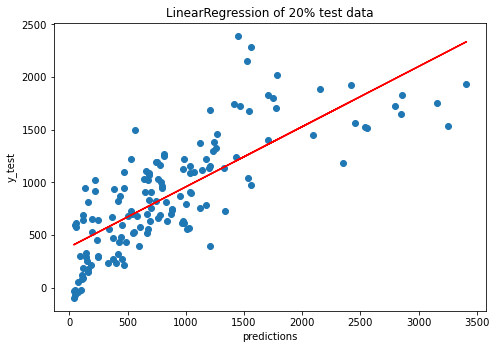

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test, pred)
ax.set_title('LinearRegression of 20% test data')
ax.set_xlabel('predictions')
ax.set_ylabel('y_test')
# Draw a line 
z=np.polyfit(y_test, pred, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='r')
print(model1.score(x_test, y_test))

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test, pred)
print(mse)
r2_value=r2_score(y_test, pred)
r2_value

210673.09677936195


0.6013016737003893

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression of Lasso

0.6022948279130089


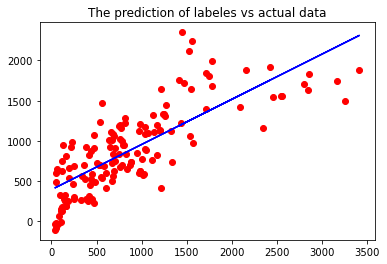

In [31]:
# Regression Analaysis of Lasso and another model is 'Ridge'
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train, y_train)
pred=model.predict(x_test)
# visulize the prediction 
plt.scatter(y_test, pred, color='r')
plt.title('The prediction of labeles vs actual data')

#Draw a line along with regression
z=np.polyfit(y_test, pred, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='b')
print(model.score(x_test, y_test))

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
men=mean_squared_error(y_test, pred)
print(men)
RMSE=np.sqrt(men)
print(men)
r2_score=r2_score(y_test, pred)
r2_score

210148.3118486251
210148.3118486251


0.6022948279130089

# DecisionTree regressor

0.6022948279130089


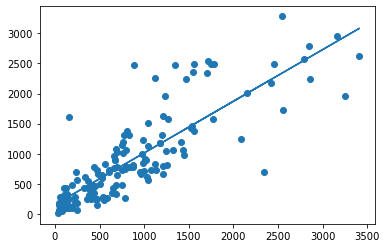

In [46]:
model3=DecisionTreeRegressor()
model3.fit(x_train, y_train)
pred3=model3.predict(x_test)
plt.scatter(y_test, pred3)
z=np.polyfit(y_test, pred3, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), 1)
print(model.score(x_test, y_test))

In [47]:
from sklearn.metrics import  r2_score, mean_squared_error
MSE=mean_squared_error(y_test, pred3)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
r2_score=r2_score(y_test, pred3)
r2_score


183515.15646258503
428.38669034248136


0.6526980100887212

# RandomForestRegressor

0.7659155794831687


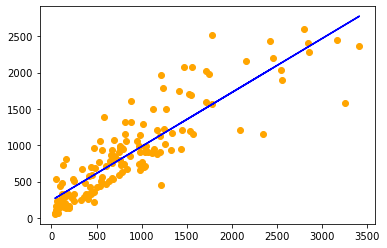

In [49]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train, y_train)
print(model2.score(x_test, y_test))
pred2=model2.predict(x_test)
plt.scatter(y_test, pred2, color='orange')
z=np.polyfit(y_test, pred2, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='b')


In [50]:
from sklearn.metrics import  r2_score, mean_squared_error
MSE=mean_squared_error(y_test, pred2)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)
r2_score=r2_score(y_test, pred2)
r2_score


123690.73689319727
351.6969389875284


0.7659155794831687

#For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator,
#which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and 
#taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally
#reduce the loss (error) in the model.

MSE: 118470.84921023794
RMSE: 344.19594595264766
0.7757942043027746


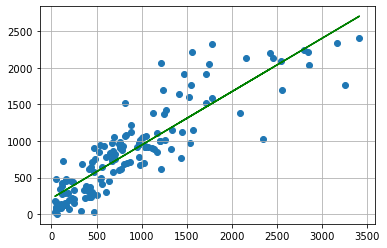

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
model4=GradientBoostingRegressor()
model4.fit(x_train, y_train)
pred4=model4.predict(x_test)
plt.scatter(y_test, pred4)
z=np.polyfit(y_test, pred4, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='g')
plt.grid()
mse=mean_squared_error(y_test, pred4)
print('MSE:', mse)
rmse=np.sqrt(mse)
print('RMSE:', rmse)
r2_value=r2_score(y_test, pred4)
print(r2_value)

# Super vector Machine

0.006802721088435374
0.02054794520547945


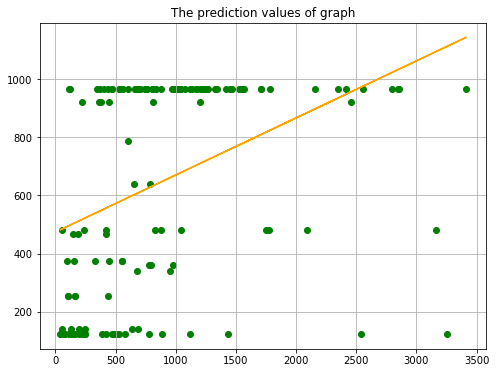

In [52]:
from sklearn.svm import SVC
model22=SVC()
model22.fit(x_train, y_train)
print(model22.score(x_test, y_test))
print(model22.score(x_train, y_train))
pred=model22.predict(x_test)
fig=plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, color='g')
plt.title('The prediction values of graph')
z=np.polyfit(y_test, pred, 1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test), color='orange')
plt.grid()
plt.show()

In [53]:
adjusted_r2_score=1-(1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_r2_score)

0.6381891810964808


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var=pd.Series([variance_inflation_factor(x.values, ids)
              for ids in range(x.shape[1])],
              index=x.columns)
print(var)

season         21.246305
mnth           15.236138
holiday         1.098223
weekday         3.096611
workingday      3.271391
weathersit     13.156133
temp          492.280793
atemp         556.193009
hum            28.042012
windspeed       5.231729
dtype: float64
